In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
#load data
tweetsObama_df= pd.read_csv('Tweets-BarackObama.csv')
tweetsObama_df.head()

,Date,Username,Tweet-text,Tweet Link,Retweets,Likes,TweetImageUrl,Image
0,2019/04/10_17:08,https://twitter.com/BarackObama,From a big NBA fan congrats to future Hall of ...,https://twitter.com/BarackObama/status/1116130...,20954,175133,NaN,NaN
1,2019/04/06_06:16,https://twitter.com/BarackObama,In just a few minutes I’m taking the stage at ...,https://twitter.com/BarackObama/status/1114517...,5206,36179,NaN,NaN
2,2019/04/05_09:25,https://twitter.com/BarackObama,A voice everybody should hear.https://twitter....,https://twitter.com/BarackObama/status/1114202...,27938,134604,NaN,NaN
3,2019/04/04_12:23,https://twitter.com/BarackObama,Here’s a story about people doing good that's ...,https://twitter.com/BarackObama/status/1113884...,15396,78627,NaN,NaN
4,2019/04/03_12:07,https://twitter.com/BarackObama,Great to see Chicago’s historic mayoral race b...,https://twitter.com/BarackObama/status/1113518...,8991,98094,NaN,NaN


In [3]:
tweetsObama_df_prep = tweetsObama_df
tweetsObama_df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6851 entries, 0 to 6850
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6851 non-null   object 
 1   Username       6851 non-null   object 
 2   Tweet-text     6851 non-null   object 
 3   Tweet Link     6851 non-null   object 
 4   Retweets       6851 non-null   int64  
 5   Likes          6851 non-null   int64  
 6   TweetImageUrl  1408 non-null   object 
 7   Image          0 non-null      float64
dtypes: float64(1), int64(2), object(5)
memory usage: 428.3+ KB


In [4]:
tweetsObama_df_prep['Tweet-text']

0       From a big NBA fan congrats to future Hall of ...
1       In just a few minutes I’m taking the stage at ...
2       A voice everybody should hear.https://twitter....
3       Here’s a story about people doing good that's ...
4       Great to see Chicago’s historic mayoral race b...
                              ...                        
6846    25 reasons that 25 people are voting for Presi...
6847    At the final rally of his final campaign last ...
6848    It’s Election Day! This is your last chance to...
6849    Election Day is here! Confirm your polling pla...
6850    President Obama tells the story of "Fired up! ...
Name: Tweet-text, Length: 6851, dtype: object

In [5]:
tweetsObama_df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6851 entries, 0 to 6850
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6851 non-null   object 
 1   Username       6851 non-null   object 
 2   Tweet-text     6851 non-null   object 
 3   Tweet Link     6851 non-null   object 
 4   Retweets       6851 non-null   int64  
 5   Likes          6851 non-null   int64  
 6   TweetImageUrl  1408 non-null   object 
 7   Image          0 non-null      float64
dtypes: float64(1), int64(2), object(5)
memory usage: 428.3+ KB


In [11]:
# create function to cleaning the text in column'Tweet-text' from stop words, 
# upper case, etc. 


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def cleanText(column,x,data):
    stopwords=nltk.corpus.stopwords.words('english')
    df=data
    text=df[column].str.lower()
    text=text.str.replace(r'[^\w\s]+', '')
    text=text.str.cat(sep=' ')
    tweets_df_words = nltk.word_tokenize(text)

    tweets_df_words_freq = nltk.FreqDist(tweets_df_words)

    tweets_df_stopwords = nltk.FreqDist(w for w in tweets_df_words if w not in stopwords)

    countWords=tweets_df_stopwords.most_common(x)
    return(countWords)


In [12]:
cleanText('Tweet-text',100,tweetsObama_df_prep)

[('president', 2681),
 ('obama', 2376),
 ('health', 495),
 ('congress', 452),
 ('time', 442),
 ('americans', 418),
 ('watch', 380),
 ('care', 367),
 ('get', 359),
 ('today', 356),
 ('change', 349),
 ('make', 341),
 ('people', 312),
 ('climate', 312),
 ('actonclimate', 291),
 ('live', 271),
 ('economy', 270),
 ('ofa', 266),
 ('help', 258),
 ('obamacare', 254),
 ('immigration', 253),
 ('america', 250),
 ('new', 247),
 ('us', 246),
 ('gun', 240),
 ('one', 234),
 ('american', 229),
 ('act', 215),
 ('support', 212),
 ('reform', 210),
 ('dont', 209),
 ('work', 206),
 ('insurance', 205),
 ('jobs', 202),
 ('read', 199),
 ('need', 195),
 ('senate', 195),
 ('name', 194),
 ('country', 183),
 ('add', 181),
 ('year', 177),
 ('agree', 177),
 ('want', 170),
 ('raisethewage', 167),
 ('fight', 164),
 ('million', 162),
 ('wage', 161),
 ('keep', 160),
 ('take', 159),
 ('every', 156),
 ('action', 156),
 ('affordable', 156),
 ('minimum', 155),
 ('violence', 151),
 ('years', 150),
 ('house', 149),
 ('plan',

In [13]:
s=tweetsObama_df_prep['Tweet-text']
num_of_words=s.str.len()
print(num_of_words)

0       127
1       300
2        86
3       300
4       275
       ... 
6846     79
6847    131
6848    137
6849    131
6850    132
Name: Tweet-text, Length: 6851, dtype: int64


In [14]:
from statistics import mean

s=tweetsObama_df_prep['Tweet-text']
print(round(mean([len(i) for i in s]),2))

115.64


In [15]:
# Convert to date format
tweetsObama_df_prep['Date'] =tweetsObama_df_prep['Date'].str.replace('_', ' ')           
tweetsObama_df_prep['Date']



0       2019/04/10 17:08
1       2019/04/06 06:16
2       2019/04/05 09:25
3       2019/04/04 12:23
4       2019/04/03 12:07
              ...       
6846    2012/11/06 05:12
6847    2012/11/06 04:49
6848    2012/11/06 04:00
6849    2012/11/06 03:28
6850    2012/11/05 22:07
Name: Date, Length: 6851, dtype: object

In [16]:
from datetime import datetime
tweetsObama_df_prep['Date'] =  pd.to_datetime(tweetsObama_df_prep['Date'])
tweetsObama_df_prep.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6851 entries, 0 to 6850
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           6851 non-null   datetime64[ns]
 1   Username       6851 non-null   object        
 2   Tweet-text     6851 non-null   object        
 3   Tweet Link     6851 non-null   object        
 4   Retweets       6851 non-null   int64         
 5   Likes          6851 non-null   int64         
 6   TweetImageUrl  1408 non-null   object        
 7   Image          0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 428.3+ KB


In [17]:
print(tweetsObama_df_prep['Date'][0].year)

2019


In [19]:
#Insert year column to tweetsObama_df_prep
tweetsObama_df_prep['year'] = pd.DatetimeIndex(tweetsObama_df_prep['Date']).year
tweetsObama_df_prep.head()



,Date,Username,Tweet-text,Tweet Link,Retweets,Likes,TweetImageUrl,Image,hour,year
0,2019-04-10 17:08:00,https://twitter.com/BarackObama,From a big NBA fan congrats to future Hall of ...,https://twitter.com/BarackObama/status/1116130...,20954,175133,NaN,NaN,17,2019
1,2019-04-06 06:16:00,https://twitter.com/BarackObama,In just a few minutes I’m taking the stage at ...,https://twitter.com/BarackObama/status/1114517...,5206,36179,NaN,NaN,6,2019
2,2019-04-05 09:25:00,https://twitter.com/BarackObama,A voice everybody should hear.https://twitter....,https://twitter.com/BarackObama/status/1114202...,27938,134604,NaN,NaN,9,2019
3,2019-04-04 12:23:00,https://twitter.com/BarackObama,Here’s a story about people doing good that's ...,https://twitter.com/BarackObama/status/1113884...,15396,78627,NaN,NaN,12,2019
4,2019-04-03 12:07:00,https://twitter.com/BarackObama,Great to see Chicago’s historic mayoral race b...,https://twitter.com/BarackObama/status/1113518...,8991,98094,NaN,NaN,12,2019


In [20]:
#Insert hour column to tweetsObama_df_prep
tweetsObama_df_prep['hour'] = pd.DatetimeIndex(tweetsObama_df_prep['Date']).hour
tweetsObama_df_prep.head()



,Date,Username,Tweet-text,Tweet Link,Retweets,Likes,TweetImageUrl,Image,hour,year
0,2019-04-10 17:08:00,https://twitter.com/BarackObama,From a big NBA fan congrats to future Hall of ...,https://twitter.com/BarackObama/status/1116130...,20954,175133,NaN,NaN,17,2019
1,2019-04-06 06:16:00,https://twitter.com/BarackObama,In just a few minutes I’m taking the stage at ...,https://twitter.com/BarackObama/status/1114517...,5206,36179,NaN,NaN,6,2019
2,2019-04-05 09:25:00,https://twitter.com/BarackObama,A voice everybody should hear.https://twitter....,https://twitter.com/BarackObama/status/1114202...,27938,134604,NaN,NaN,9,2019
3,2019-04-04 12:23:00,https://twitter.com/BarackObama,Here’s a story about people doing good that's ...,https://twitter.com/BarackObama/status/1113884...,15396,78627,NaN,NaN,12,2019
4,2019-04-03 12:07:00,https://twitter.com/BarackObama,Great to see Chicago’s historic mayoral race b...,https://twitter.com/BarackObama/status/1113518...,8991,98094,NaN,NaN,12,2019


In [25]:
options=['8']
tweetsObama_df_eightAM = tweetsObama_df_prep.loc[tweetsObama_df_prep['hour'].isin(options)]

options=['17']
tweetsObama_df_FivetAM = tweetsObama_df_prep.loc[tweetsObama_df_prep['hour'].isin(options)]

options=['9','10','11','12','13','14','15','16']
tweetsObama_df_between = tweetsObama_df_prep.loc[tweetsObama_df_prep['hour'].isin(options)]


In [27]:
cleanText('Tweet-text',100,tweetsObama_df_between)

[('president', 1954),
 ('obama', 1733),
 ('health', 361),
 ('congress', 344),
 ('americans', 327),
 ('time', 322),
 ('care', 279),
 ('get', 273),
 ('make', 263),
 ('today', 258),
 ('watch', 256),
 ('change', 245),
 ('climate', 241),
 ('people', 225),
 ('actonclimate', 222),
 ('ofa', 210),
 ('immigration', 190),
 ('economy', 188),
 ('obamacare', 187),
 ('help', 185),
 ('live', 185),
 ('new', 180),
 ('gun', 178),
 ('america', 176),
 ('american', 171),
 ('reform', 168),
 ('dont', 165),
 ('support', 164),
 ('us', 162),
 ('read', 162),
 ('act', 162),
 ('one', 160),
 ('senate', 158),
 ('work', 152),
 ('insurance', 150),
 ('need', 149),
 ('jobs', 149),
 ('name', 149),
 ('agree', 147),
 ('country', 143),
 ('add', 139),
 ('fight', 133),
 ('raisethewage', 131),
 ('million', 130),
 ('want', 129),
 ('wage', 128),
 ('take', 125),
 ('year', 125),
 ('minimum', 123),
 ('action', 120),
 ('keep', 119),
 ('affordable', 116),
 ('good', 114),
 ('families', 114),
 ('every', 114),
 ('house', 112),
 ('tell', 

In [64]:
options=['2012','2013','2014','2015','2016']
tweetsObama_df_2ndPresidency = tweetsObama_df_prep.loc[tweetsObama_df_prep['year'].isin(options)]

options = ['2017','2018', '2019'] 
tweetsObama_df_AftPresidency = tweetsObama_df_prep.loc[tweetsObama_df_prep['year'].isin(options)] 



tweetsObama_df_AftPresidency

,Date,Username,Tweet-text,Tweet Link,Retweets,Likes,TweetImageUrl,Image,year
0,2019-04-10 17:08:00,https://twitter.com/BarackObama,From a big NBA fan congrats to future Hall of ...,https://twitter.com/BarackObama/status/1116130...,20954,175133,NaN,NaN,2019
1,2019-04-06 06:16:00,https://twitter.com/BarackObama,In just a few minutes I’m taking the stage at ...,https://twitter.com/BarackObama/status/1114517...,5206,36179,NaN,NaN,2019
2,2019-04-05 09:25:00,https://twitter.com/BarackObama,A voice everybody should hear.https: twitter....,https://twitter.com/BarackObama/status/1114202...,27938,134604,NaN,NaN,2019
3,2019-04-04 12:23:00,https://twitter.com/BarackObama,Here’s a story about people doing good that's ...,https://twitter.com/BarackObama/status/1113884...,15396,78627,NaN,NaN,2019
4,2019-04-03 12:07:00,https://twitter.com/BarackObama,Great to see Chicago’s historic mayoral race b...,https://twitter.com/BarackObama/status/1113518...,8991,98094,NaN,NaN,2019
...,...,...,...,...,...,...,...,...,...
171,2017-02-14 07:34:00,https://twitter.com/BarackObama,Happy Valentine’s Day @michelleobama! Almost 2...,https://twitter.com/BarackObama/status/8315271...,247917,1073972,https://pbs.twimg.com/media/C4otUykWcAIbSy1.jpg,NaN,2017
172,2017-01-22 10:07:00,https://twitter.com/BarackObama,I read letters like these every single day. It...,https://twitter.com/BarackObama/status/8232305...,34311,232383,NaN,NaN,2017
173,2017-01-20 13:05:00,https://twitter.com/BarackObama,In the meantime I want to hear what you're thi...,https://twitter.com/BarackObama/status/8225505...,51513,231463,NaN,NaN,2017
174,2017-01-20 13:04:00,https://twitter.com/BarackObama,Hi everybody! Back to the original handle. Is ...,https://twitter.com/BarackObama/status/8225503...,414272,1801413,NaN,NaN,2017


In [65]:
print("Toal: " + str(tweetsObama_df_prep.shape[0]),
"After: " + str(tweetsObama_df_AftPresidency.shape[0]), 
"Presidency: " +str(tweetsObama_df_2ndPresidency.shape[0]))

Toal: 6851 After: 176 Presidency: 6675


In [66]:
cleanText('Tweet-text',100,tweetsObama_df_2ndPresidency)

[('ofabo', 3721),
 ('http', 2891),
 ('president', 2679),
 ('obama', 2369),
 ('health', 482),
 ('pictwittercom', 454),
 ('congress', 452),
 ('time', 428),
 ('americans', 402),
 ('watch', 378),
 ('care', 360),
 ('get', 342),
 ('today', 337),
 ('change', 333),
 ('make', 321),
 ('climate', 312),
 ('live', 293),
 ('actonclimate', 291),
 ('people', 282),
 ('economy', 270),
 ('ofa', 266),
 ('obamacare', 254),
 ('immigration', 253),
 ('help', 246),
 ('america', 243),
 ('new', 239),
 ('gun', 233),
 ('american', 224),
 ('one', 219),
 ('us', 212),
 ('act', 210),
 ('reform', 210),
 ('support', 208),
 ('dont', 207),
 ('jobs', 202),
 ('insurance', 202),
 ('read', 197),
 ('senate', 195),
 ('work', 195),
 ('name', 194),
 ('need', 184),
 ('add', 181),
 ('agree', 177),
 ('country', 170),
 ('year', 169),
 ('raisethewage', 167),
 ('million', 161),
 ('fight', 161),
 ('wage', 161),
 ('want', 161),
 ('affordable', 156),
 ('minimum', 155),
 ('action', 153),
 ('keep', 150),
 ('address', 148),
 ('take', 148),
 

In [44]:

# from wordcloud import WordCloud, ImageColorGenerator
# #  The way to print WordCloud efficiently  refer to https://www.kaggle.com/justjun0321/way-to-google-get-a-job-in-goggle-word-cloud.

# def wordCloud(column,data):
#     text= " ".join(word for word in data[column])
#     wordcloud = WordCloud(width = 700, height = 700,background_color="white",min_font_size=10).generate(text)
#     plt.figure(figsize = (5, 5), facecolor = None)
#     plt.imshow(wordcloud, interpolation="bilinear")
#     plt.axis("off")
#     plt.margins(x=0, y=0)
#     plt.title(text,size=24)
#     plt.show()

In [28]:
# stopwords=nltk.corpus.stopwords.words('english')
# text=tweetsObama_df_2ndPresidency['tweetText'].str.lower()
# text=text.str.replace(r'[^\w\s]+', '')
# text=text.str.cat(sep=' ')

# tweetsObama_df_2ndPresidency_words = nltk.word_tokenize(text)

# tweetsObama_df_2ndPresidency_words_dis = nltk.FreqDist(tweetsObama_df_2ndPresidency_words)

# tweetsObama_df_2ndPresidency_stopwords_dis = nltk.FreqDist(w for w in tweetsObama_df_2ndPresidency_words if w not in stopwords)

# tweetsObama_df_2ndPresidency_stopwords_dis.most_common(20)

In [216]:
#Import image for wordCloud

from PIL import Image 

mask = np.array(Image.open("Obama.png"))
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
    
# Transform mask into a new one that will work with the function:
transformed_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

for i in range(len(mask)):
    transformed_mask[i] = list(map(transform_format, mask[i]))

In [121]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["http", "https", "twittercom", "twitter","pictwittercom","pic"])

In [217]:
#Create a wordCloud function
def wordcloud(data,column,transformed_mask,stopwords):
    text=" ".join(word for word in data[column])

    wc = WordCloud(background_color="white", stopwords=stopwords, max_words=1000, mask=transformed_mask,contour_width=1, contour_color='steelblue')

    # Generate a wordcloud
    wc.generate(text)
    # wc.generate_from_frequencies(words_counter)

    # create coloring from image
    image_colors = ImageColorGenerator(transformed_mask)
    plt.figure(figsize=[7,7])
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")


    # store to file
    # plt.savefig("img/us_wine.png", format="png")
    p=plt.show()
    return p

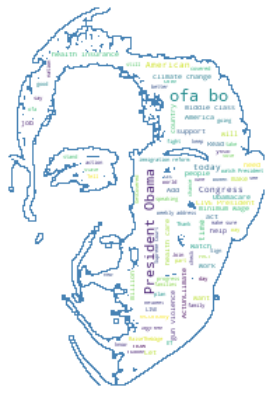

In [222]:
wordcloud(tweetsObama_df_prep,'Tweet-text',transformed_mask,stopwords)

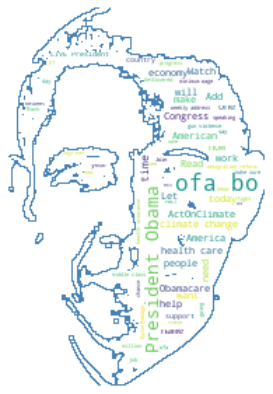

In [219]:
wordcloud(tweetsObama_df_2ndPresidency,'Tweet-text',transformed_mask,stopwords)

In [84]:
cleanText('Tweet-text',100,tweetsObama_df_AftPresidency)

[('twittercom', 39),
 ('status', 39),
 ('us', 34),
 ('people', 30),
 ('world', 28),
 ('http', 23),
 ('im', 22),
 ('young', 21),
 ('happy', 21),
 ('obamafoundation', 20),
 ('make', 20),
 ('day', 19),
 ('today', 19),
 ('vote', 18),
 ('get', 17),
 ('leaders', 16),
 ('https', 16),
 ('americans', 16),
 ('change', 16),
 ('one', 15),
 ('proud', 14),
 ('time', 14),
 ('michelle', 14),
 ('first', 13),
 ('michelleobama', 13),
 ('country', 13),
 ('health', 13),
 ('help', 12),
 ('always', 12),
 ('like', 12),
 ('work', 11),
 ('hope', 11),
 ('need', 11),
 ('take', 11),
 ('families', 10),
 ('see', 10),
 ('power', 10),
 ('sure', 10),
 ('keep', 10),
 ('family', 10),
 ('future', 9),
 ('best', 9),
 ('every', 9),
 ('communities', 9),
 ('want', 9),
 ('better', 9),
 ('chicago', 9),
 ('love', 9),
 ('voice', 8),
 ('everybody', 8),
 ('thats', 8),
 ('great', 8),
 ('hard', 8),
 ('inspired', 8),
 ('go', 8),
 ('victims', 8),
 ('new', 8),
 ('team', 8),
 ('women', 8),
 ('well', 8),
 ('year', 8),
 ('everyone', 8),
 ('

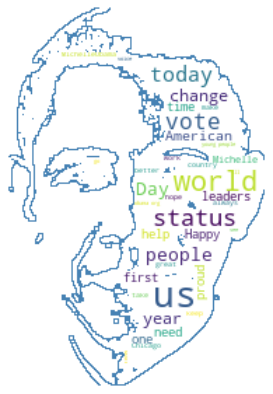

In [186]:
wordcloud(tweetsObama_df_AftPresidency,'Tweet-text',transformed_mask,stopwords)

In [28]:
#load data
tweetsTrump_df= pd.read_csv('trumptweets.csv')
tweetsTrump_df.head()

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN


In [29]:
tweetsTrump_df_prep = tweetsTrump_df
tweetsTrump_df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41122 entries, 0 to 41121
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         41122 non-null  int64  
 1   link       41122 non-null  object 
 2   content    41122 non-null  object 
 3   date       41122 non-null  object 
 4   retweets   41122 non-null  int64  
 5   favorites  41122 non-null  int64  
 6   mentions   22467 non-null  object 
 7   hashtags   5810 non-null   object 
 8   geo        0 non-null      float64
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ MB


In [30]:
# Convert to date format
tweetsTrump_df_prep['date'] =tweetsTrump_df_prep['date'].str.replace('_', ' ')           
tweetsTrump_df_prep['date']



0        2009-05-04 20:54:25
1        2009-05-05 03:00:10
2        2009-05-08 15:38:08
3        2009-05-08 22:40:15
4        2009-05-12 16:07:28
                ...         
41117    2020-01-19 19:24:52
41118    2020-01-19 22:12:20
41119    2020-01-20 01:27:07
41120    2020-01-20 02:16:00
41121    2020-01-20 02:57:49
Name: date, Length: 41122, dtype: object

In [31]:
from datetime import datetime
tweetsTrump_df_prep['date'] =  pd.to_datetime(tweetsTrump_df_prep['date'])
tweetsTrump_df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41122 entries, 0 to 41121
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         41122 non-null  int64         
 1   link       41122 non-null  object        
 2   content    41122 non-null  object        
 3   date       41122 non-null  datetime64[ns]
 4   retweets   41122 non-null  int64         
 5   favorites  41122 non-null  int64         
 6   mentions   22467 non-null  object        
 7   hashtags   5810 non-null   object        
 8   geo        0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 2.8+ MB


In [32]:
print(tweetsTrump_df_prep['date'][0].year)


2009


In [33]:
#Insert year column to tweetsTrump_df_prep
tweetsTrump_df_prep['year'] = pd.DatetimeIndex(tweetsTrump_df_prep['date']).year
tweetsTrump_df_prep.head()


,id,link,content,date,retweets,favorites,mentions,hashtags,geo,year
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN,2009
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN,2009
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN,2009
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN,2009
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN,2009


In [34]:
#Insert hour column to tweetsTrump_df_prep
tweetsTrump_df_prep['hour'] = pd.DatetimeIndex(tweetsTrump_df_prep['date']).hour
tweetsTrump_df_prep.head()

,id,link,content,date,retweets,favorites,mentions,hashtags,geo,year,hour
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN,2009,20
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN,2009,3
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN,2009,15
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN,2009,22
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN,2009,16


In [152]:
# len coontent
s=tweetsTrump_df_prep['content']
num_of_words=s.str.len()
print(num_of_words)

0        117
1        131
2        116
3        103
4        109
        ... 
41117     94
41118    277
41119    325
41120    177
41121    111
Name: content, Length: 41122, dtype: int64


In [154]:
# tweetsTrump_df_prep['content'][41119]

In [157]:
#Avg words in tweet
from statistics import mean

s=tweetsTrump_df_prep['content']
print(round(mean([len(i) for i in s]),2))

129.76


In [158]:
cleanText('content',100,tweetsTrump_df_prep)

[('realdonaldtrump', 8578),
 ('great', 6100),
 ('trump', 5070),
 ('president', 2765),
 ('thank', 2756),
 ('people', 2444),
 ('thanks', 2123),
 ('us', 2117),
 ('would', 1890),
 ('get', 1835),
 ('new', 1823),
 ('donald', 1822),
 ('country', 1765),
 ('like', 1630),
 ('america', 1621),
 ('good', 1572),
 ('time', 1553),
 ('big', 1549),
 ('one', 1505),
 ('make', 1485),
 ('obama', 1444),
 ('dont', 1432),
 ('never', 1369),
 ('many', 1332),
 ('going', 1162),
 ('much', 1152),
 ('run', 1144),
 ('back', 1127),
 ('vote', 1112),
 ('news', 1083),
 ('best', 1075),
 ('today', 1070),
 ('want', 1039),
 ('love', 1023),
 ('see', 1017),
 ('need', 1001),
 ('think', 998),
 ('must', 949),
 ('democrats', 948),
 ('job', 930),
 ('really', 925),
 ('even', 915),
 ('go', 914),
 ('years', 913),
 ('last', 872),
 ('true', 856),
 ('know', 852),
 ('via', 850),
 ('china', 847),
 ('bad', 833),
 ('cant', 825),
 ('hillary', 824),
 ('show', 819),
 ('win', 816),
 ('deal', 815),
 ('way', 802),
 ('american', 797),
 ('work', 794)

In [41]:
options=['13','14','15']
tweetsTrump_df_twoPM = tweetsTrump_df_prep.loc[tweetsTrump_df_prep['hour'].isin(options)]

options=['21','22']
tweetsTrump_df_ninePM = tweetsTrump_df_prep.loc[tweetsTrump_df_prep['hour'].isin(options)]

options=['18','19','20']
tweetsTrump_df_between = tweetsTrump_df_prep.loc[tweetsTrump_df_prep['hour'].isin(options)]

In [43]:
cleanText('content',100,tweetsTrump_df_ninePM)

[('great', 782),
 ('trump', 567),
 ('realdonaldtrump', 423),
 ('us', 328),
 ('people', 325),
 ('thank', 324),
 ('obama', 307),
 ('thanks', 305),
 ('new', 261),
 ('barackobama', 249),
 ('like', 227),
 ('dont', 225),
 ('get', 215),
 ('time', 209),
 ('good', 208),
 ('via', 207),
 ('president', 204),
 ('big', 202),
 ('america', 200),
 ('make', 199),
 ('china', 197),
 ('never', 197),
 ('think', 190),
 ('donald', 182),
 ('today', 182),
 ('one', 176),
 ('would', 175),
 ('country', 171),
 ('many', 167),
 ('must', 148),
 ('see', 144),
 ('cont', 144),
 ('work', 142),
 ('going', 141),
 ('best', 140),
 ('back', 134),
 ('obamacare', 131),
 ('jobs', 131),
 ('know', 131),
 ('keep', 128),
 ('much', 126),
 ('go', 123),
 ('even', 122),
 ('american', 121),
 ('job', 120),
 ('vote', 120),
 ('last', 118),
 ('need', 117),
 ('deal', 117),
 ('cant', 115),
 ('entrepreneurs', 112),
 ('day', 111),
 ('want', 108),
 ('always', 106),
 ('news', 103),
 ('first', 103),
 ('years', 103),
 ('true', 103),
 ('way', 102),
 (

In [161]:
options=['2009','2010','2011','2012','2013','2014','2015','2016']
tweetsTrump_df_prePresidency = tweetsTrump_df_prep.loc[tweetsTrump_df_prep['year'].isin(options)]

options = ['2017','2018', '2019','2020'] 
tweetsTrump_df_Presidency = tweetsTrump_df_prep.loc[tweetsTrump_df_prep['year'].isin(options)] 


In [164]:
print("Toal: " + str(tweetsTrump_df_prep.shape[0]),
"Before: " + str(tweetsTrump_df_prePresidency.shape[0]), 
"Presidency: " +str(tweetsTrump_df_Presidency.shape[0]))

Toal: 41122 Before: 31123 Presidency: 9999


In [165]:
cleanText('content',100,tweetsTrump_df_prePresidency)

[('realdonaldtrump', 8574),
 ('trump', 4391),
 ('great', 3820),
 ('thanks', 2060),
 ('thank', 1958),
 ('president', 1803),
 ('donald', 1701),
 ('people', 1300),
 ('would', 1273),
 ('like', 1227),
 ('get', 1225),
 ('us', 1221),
 ('new', 1216),
 ('obama', 1215),
 ('america', 1125),
 ('one', 1060),
 ('make', 1060),
 ('good', 1055),
 ('run', 1048),
 ('dont', 1017),
 ('time', 1013),
 ('country', 964),
 ('love', 873),
 ('best', 857),
 ('think', 840),
 ('via', 824),
 ('big', 803),
 ('need', 785),
 ('never', 782),
 ('trump2016', 757),
 ('going', 753),
 ('vote', 751),
 ('true', 723),
 ('see', 722),
 ('back', 709),
 ('show', 699),
 ('cant', 686),
 ('really', 657),
 ('many', 643),
 ('barackobama', 632),
 ('go', 631),
 ('im', 616),
 ('mr', 609),
 ('much', 607),
 ('last', 606),
 ('hillary', 604),
 ('tonight', 594),
 ('know', 592),
 ('today', 578),
 ('watch', 571),
 ('interview', 566),
 ('job', 557),
 ('cont', 550),
 ('work', 538),
 ('want', 531),
 ('amazing', 521),
 ('must', 521),
 ('right', 511),


In [166]:
cleanText('content',100,tweetsTrump_df_Presidency)

[('great', 2280),
 ('people', 1144),
 ('president', 962),
 ('us', 896),
 ('democrats', 858),
 ('country', 801),
 ('thank', 798),
 ('news', 791),
 ('big', 746),
 ('fake', 728),
 ('many', 689),
 ('trump', 679),
 ('would', 617),
 ('get', 610),
 ('new', 607),
 ('border', 605),
 ('never', 587),
 ('much', 545),
 ('time', 540),
 ('good', 517),
 ('years', 510),
 ('want', 508),
 ('america', 496),
 ('today', 492),
 ('united', 465),
 ('media', 464),
 ('even', 453),
 ('one', 445),
 ('american', 440),
 ('states', 438),
 ('must', 428),
 ('done', 428),
 ('make', 425),
 ('back', 418),
 ('dont', 415),
 ('going', 409),
 ('nothing', 406),
 ('like', 403),
 ('china', 402),
 ('house', 397),
 ('job', 373),
 ('bad', 369),
 ('vote', 361),
 ('dems', 352),
 ('military', 352),
 ('trade', 344),
 ('wall', 336),
 ('deal', 335),
 ('made', 333),
 ('election', 332),
 ('jobs', 332),
 ('crime', 332),
 ('ever', 326),
 ('state', 324),
 ('way', 324),
 ('first', 323),
 ('republican', 318),
 ('win', 315),
 ('said', 314),
 ('w

In [178]:
df1 = tweetsTrump_df_prePresidency["content"].str.contains("fake") 
pd.set_option('display.max_rows', df1.shape[0]+1)
print(df1) 


0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
32       False
33       False
34       False
35       False
36       False
37       False
38       False
39       False
40       False
41       False
42       False
43       False
44       False
45       False
46       False
47       False
48       False
49       False
50       False
51       False
52       False
53       False
54       False
55       False
56       False
57       False
58       False
59       False
60       False
61       False
62       False
63       False
64       False
65       False
66       F

In [223]:
#Import image for wordCloud

from PIL import Image 

mask = np.array(Image.open("Trump.png"))
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
    
# Transform mask into a new one that will work with the function:
transformed_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

for i in range(len(mask)):
    transformed_mask[i] = list(map(transform_format, mask[i]))

In [224]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["http", "https", "twittercom", "twitter","pictwittercom","pic"])

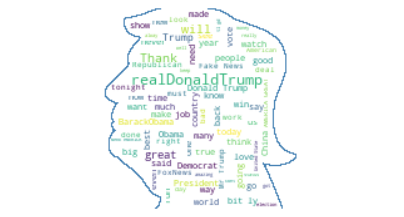

In [225]:
wordcloud(tweetsTrump_df_prep,'content',transformed_mask,stopwords)

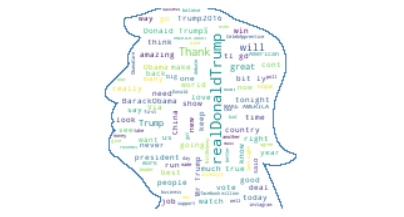

In [211]:
wordcloud(tweetsTrump_df_prePresidency,'content',transformed_mask,stopwords)

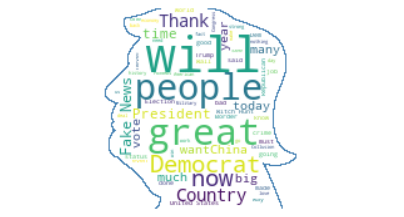

In [210]:
wordcloud(tweetsTrump_df_Presidency,'content',transformed_mask,stopwords)